In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Step 1: Reading the data

In [134]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2: Cleaning the data

<Axes: >

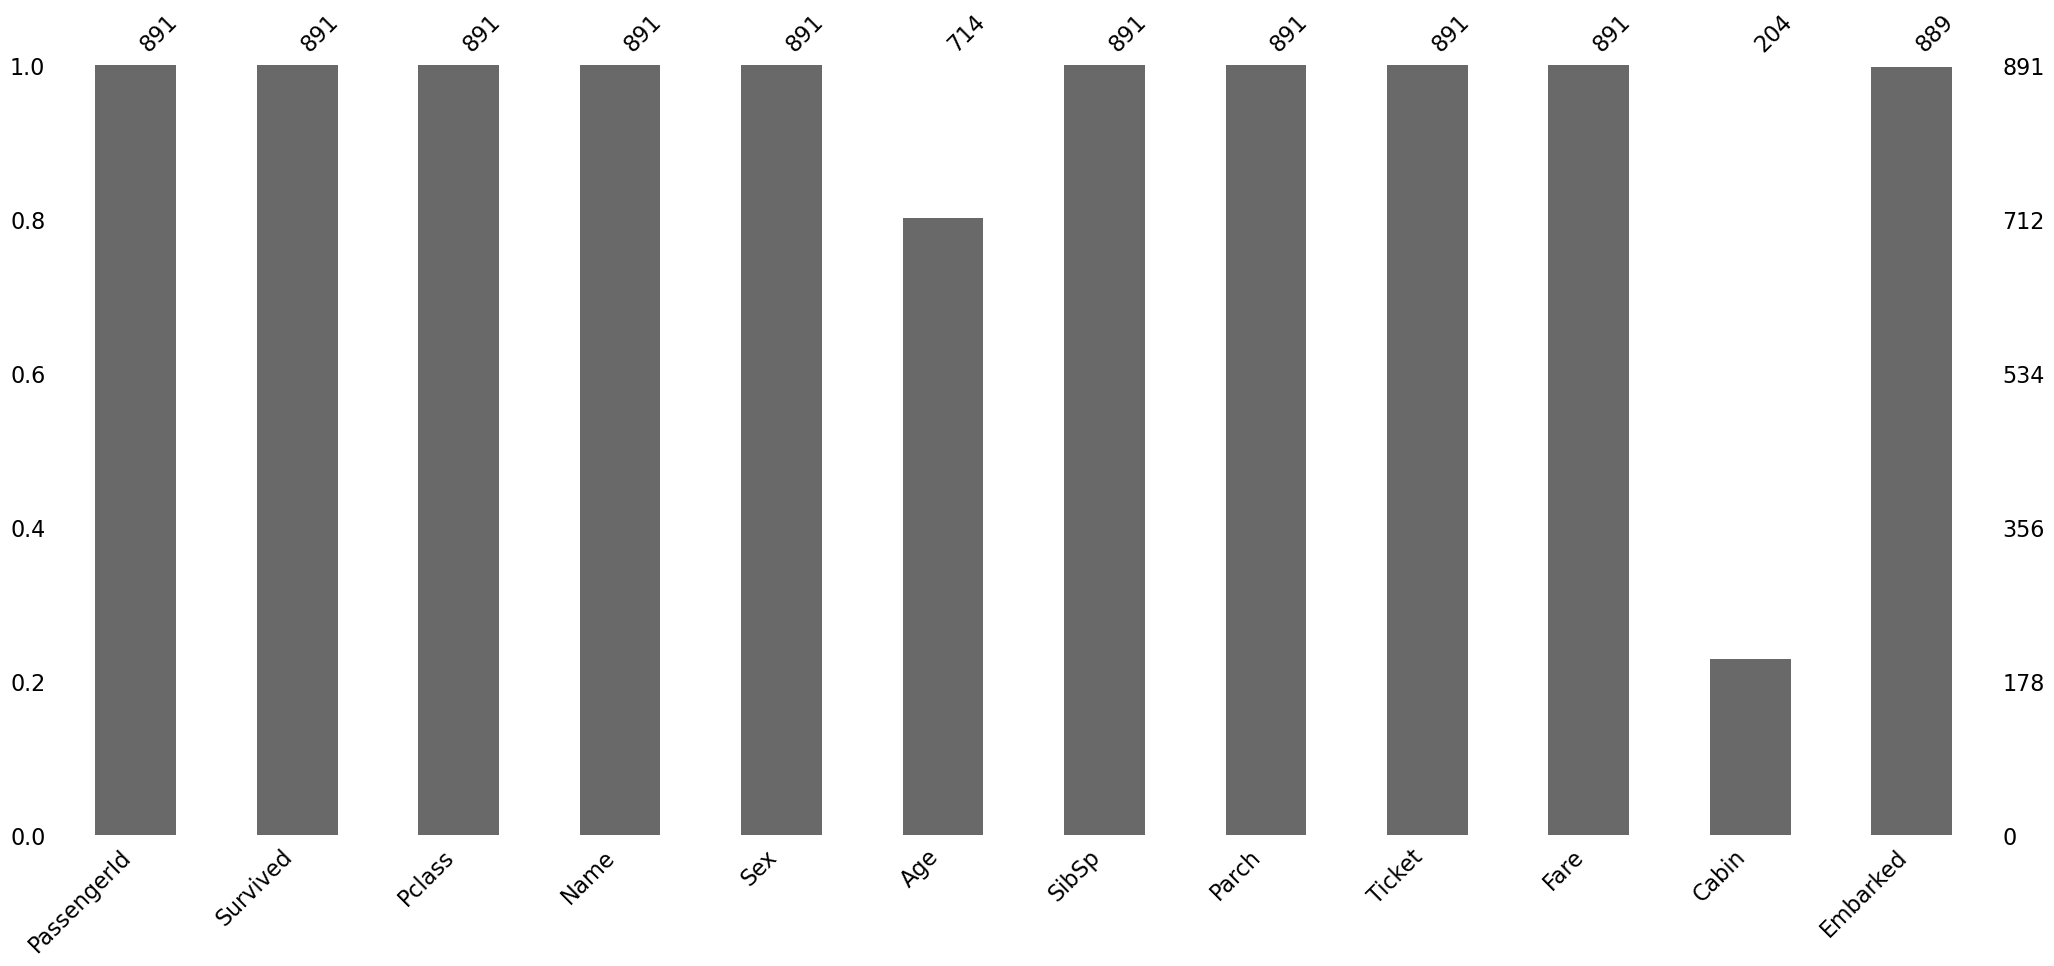

In [135]:
msno.bar(titanic) # there are missing values in age, cabin and embarked

In [136]:
titanic.isnull().sum()
# sum of missing values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The column of Cabin has the most 'NaN' values. There are 687 cells in the Cabin column that are empty.

In [137]:
titanic.loc[titanic['Embarked'].isnull(), :]
# row 61 and row 829 are the rows where 'Embarked' is empty

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [138]:
titanic.drop([61,829], inplace=True)
# delete the rows where 'Embarked' is empty

In [139]:
titanic.isnull().sum()
# double check that the sum of missing values in 'Embarked' should become 0

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [140]:
titanic['Cabin'].fillna('¯\_(ツ)_/¯', inplace=True)
# fill empty cabins with ¯\_(ツ)_/¯

### Step 3: Feature extraction

In [141]:
titanic['FamilyCount'] = titanic['SibSp'] + titanic['Parch']
# create 'FamilyCount' column which is the sum of 'SibSp' and 'Parch' columns

In [142]:
titanic.loc[titanic['Name'].str.contains('Rev.')]
# filters the dataframe to show rows where the name contains 'Rev.'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\_(ツ)_/¯,S,0
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\_(ツ)_/¯,S,0
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\_(ツ)_/¯,S,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\_(ツ)_/¯,Q,0
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\_(ツ)_/¯,S,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,¯\_(ツ)_/¯,S,0


In [143]:
titanic['IsReverend'] = titanic['Name'].str.contains('Rev.') # create 'IsReverend' column
titanic['IsReverend'] = titanic['IsReverend'].astype(int) # changes the values of the Series from True/False to 1/0

In [144]:
titanic = pd.get_dummies(titanic, columns=['Embarked'])
titanic['Embarked_C'] = titanic['Embarked_C'].astype(int)   # changes the values of the Series from True/False to 1/0
titanic['Embarked_Q'] = titanic['Embarked_Q'].astype(int) 
titanic['Embarked_S'] = titanic['Embarked_S'].astype(int)

In [145]:
titanic.head() # checkpoint

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,0,0,0,0,1


In [146]:
titanic = pd.get_dummies(titanic, columns=['Sex'])
titanic['Sex_female'] = titanic['Sex_female'].astype(int)
titanic['Sex_male'] = titanic['Sex_male'].astype(int)

In [147]:
titanic.tail() # checkpoint

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.00,¯\_(ツ)_/¯,0,1,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.00,B42,0,0,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.45,¯\_(ツ)_/¯,3,0,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.00,C148,0,0,1,0,0,0,1
890,891,0,3,"Dooley, Mr. Patrick",32.0,0,0,370376,7.75,¯\_(ツ)_/¯,0,0,0,1,0,0,1


In [148]:
# create new column named "Title"
titanic['Title'] = titanic['Name'].str.split(',') # str split comma each name into a list [Braund, Mr. Owen Harris]
titanic['Title'] = titanic['Title'].map(lambda name: name[1]) # call index 1 of each list Mr. Owen Harris
titanic['Title'] = titanic['Title'].str.split('.') # str split fullstop each name into a list [Mr, Owen Harris]
titanic['Title'] = titanic['Title'].map(lambda name: name[0]) # call index 0 of each list Mr
titanic['Title'] = titanic['Title'].str.strip() # remove redundant spaces in the str
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,1,0,0,0,1,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,0,0,0,0,1,1,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,0,0,0,0,1,0,1,Mr


### Step 4: Exploratory analysis

In [149]:
# 1 What was the survival rate overall?
print(titanic['Survived'].value_counts())
ovr_surv_rate = 340 / (549+340) * 100
print("Overall survival rate is %.1f percent." % (ovr_surv_rate))

Survived
0    549
1    340
Name: count, dtype: int64
Overall survival rate is 38.2 percent.


In [150]:
# 2 Which gender fared the worst? What was their survival rate?
print(titanic.groupby('Sex_female')['Survived'].mean())
# groupby "Sex_female: 0" means we are looking at males
# mean here refers to the total number of males who "Survived: 1" divided by the total number of males
print(f"Male survival rate is 18.9 percent.")
print(f"Female survival rate is 74.0 percent.")
print(f"Males fared the worst.")

Sex_female
0    0.188908
1    0.740385
Name: Survived, dtype: float64
Male survival rate is 18.9 percent.
Female survival rate is 74.0 percent.
Males fared the worst.


In [151]:
# 3 What was the survival rate for each `Pclass`?
print(titanic.groupby('Pclass')['Survived'].mean())
# groupby "Pclass: 1" means we are looking at people with ticketclass1
# mean here refers to the no of people with ticketclass1 who "Survived: 1" divided by the no of ppl with ticketclass1
print(f"For ticket class 1, survival rate is 62.6 percent.")
print(f"For ticket class 2, survival rate is 47.3 percent.")
print(f"For ticket class 3, survival rate is 24.2 percent.")

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64
For ticket class 1, survival rate is 62.6 percent.
For ticket class 2, survival rate is 47.3 percent.
For ticket class 3, survival rate is 24.2 percent.


In [152]:
# 4 Did any reverends survive? How many?
print(titanic.groupby('IsReverend')['Survived'].mean())
# groupby "IsReverend: 1" means we are looking at reverends only
# mean here refers to the no of reverends who "Survived: 1" divided by the no of reverends
print(f"None of the reverends survived.")

IsReverend
0    0.385051
1    0.000000
Name: Survived, dtype: float64
None of the reverends survived.


In [153]:
# 5 What is the survival rate for cabins marked ¯\\_(ツ)_/¯
print(titanic.groupby('Cabin')['Survived'].mean())
# groupby "Cabin"
# mean here refers to no of ppl in "unknown cabins" who "Survived: 1" divided by the no of ppl in "unknown cabins"
print(f"Survival rate for unknown cabins is 29.98 percent.")

Cabin
A10          0.000000
A14          0.000000
A16          1.000000
A19          0.000000
A20          1.000000
               ...   
F38          0.000000
F4           1.000000
G6           0.500000
T            0.000000
¯\_(ツ)_/¯    0.299854
Name: Survived, Length: 147, dtype: float64
Survival rate for unknown cabins is 29.98 percent.


In [154]:
# 6 What is the survival rate for people whose `Age` is empty?
unknown_age = titanic[titanic['Age'].isnull()]
print(unknown_age['Survived'].mean())
# groupby "Cabin"
# mean here refers to the no of ppl in unknown cabins who "Survived: 1" divided by the no of ppl in unknown cabins
print(f"Survival rate for people whose 'Age' is empty is 29.4 percent.")

0.2937853107344633
Survival rate for people whose 'Age' is empty is 29.4 percent.


In [155]:
# 7 What is the survival rate for each port of embarkation?
print(titanic.groupby('Embarked_C')['Survived'].mean())
print(f"Survival rate for people who embarked in Cherbourg is 55.4 percent.")
print(titanic.groupby('Embarked_Q')['Survived'].mean())
print(f"Survival rate for people who embarked in Queenstown is 38.96 percent.")
print(titanic.groupby('Embarked_S')['Survived'].mean())
print(f"Survival rate for people who embarked in Southampton is 33.7 percent.")

Embarked_C
0    0.342580
1    0.553571
Name: Survived, dtype: float64
Survival rate for people who embarked in Cherbourg is 55.4 percent.
Embarked_Q
0    0.381773
1    0.389610
Name: Survived, dtype: float64
Survival rate for people who embarked in Queenstown is 38.96 percent.
Embarked_S
0    0.502041
1    0.336957
Name: Survived, dtype: float64
Survival rate for people who embarked in Southampton is 33.7 percent.


In [156]:
# 8 What is the survival rate for children (under 12) in each `Pclass`?
under_12 = titanic[titanic['Age'] < 12] # dataframe of only children under 12
print(under_12.groupby('Pclass')['Survived'].mean())
print(f"Survival rate for children (under 12) who are in ticketclass 1 is 75 percent.")
print(f"All children (under 12) who are in ticketclass 2 survived.")
print(f"Survival rate for children (under 12) who are in ticketclass 3 is 40.4 percent.")

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64
Survival rate for children (under 12) who are in ticketclass 1 is 75 percent.
All children (under 12) who are in ticketclass 2 survived.
Survival rate for children (under 12) who are in ticketclass 3 is 40.4 percent.


In [157]:
# 9 Did the captain of the ship survive? Is he on the list?
print(f"No, the captain of the ship did not survive.")
titanic[titanic['Name'].str.contains('Capt')]

No, the captain of the ship did not survive.


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title
745,746,0,1,"Crosby, Capt. Edward Gifford",70.0,1,1,WE/P 5735,71.0,B22,2,0,0,0,1,0,1,Capt


In [158]:
# 10 Of all the people that died, who had the most expensive ticket? How much did it cost?
print(f'Of all the people that died, Mr Charles Fortune and Mr Mark Fortune had the most expensive tickets. It costed 263.')
did_not_survive = titanic[titanic['Survived'] == 0]
did_not_survive.sort_values(by=['Fare'], ascending=False).head()

Of all the people that died, Mr Charles Fortune and Mr Mark Fortune had the most expensive tickets. It costed 263.


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title
27,28,0,1,"Fortune, Mr. Charles Alexander",19.0,3,2,19950,263.0000,C23 C25 C27,5,0,0,0,1,0,1,Mr
438,439,0,1,"Fortune, Mr. Mark",64.0,1,4,19950,263.0000,C23 C25 C27,5,0,0,0,1,0,1,Mr
118,119,0,1,"Baxter, Mr. Quigg Edmond",24.0,0,1,PC 17558,247.5208,B58 B60,1,0,1,0,0,0,1,Mr
557,558,0,1,"Robbins, Mr. Victor",NaN,0,0,PC 17757,227.5250,¯\_(ツ)_/¯,0,0,1,0,0,0,1,Mr
527,528,0,1,"Farthing, Mr. John",NaN,0,0,PC 17483,221.7792,C95,0,0,0,0,1,0,1,Mr


In [159]:
# 11 Does having family on the boat help or hurt your chances of survival?
has_family = titanic[titanic['FamilyCount'] != 0]
no_family = titanic[titanic['FamilyCount'] == 0]
print(has_family['Survived'].mean())
print(no_family['Survived'].mean())
print(f'Survival rate for those with family is 50.6%.')
print(f'Survival rate for those without family is 30.1%.')
print(f'Thus, having family on the boat helps your chances of survival.')

0.5056497175141242
0.30093457943925234
Survival rate for those with family is 50.6%.
Survival rate for those without family is 30.1%.
Thus, having family on the boat helps your chances of survival.


### Step 5: Plotting

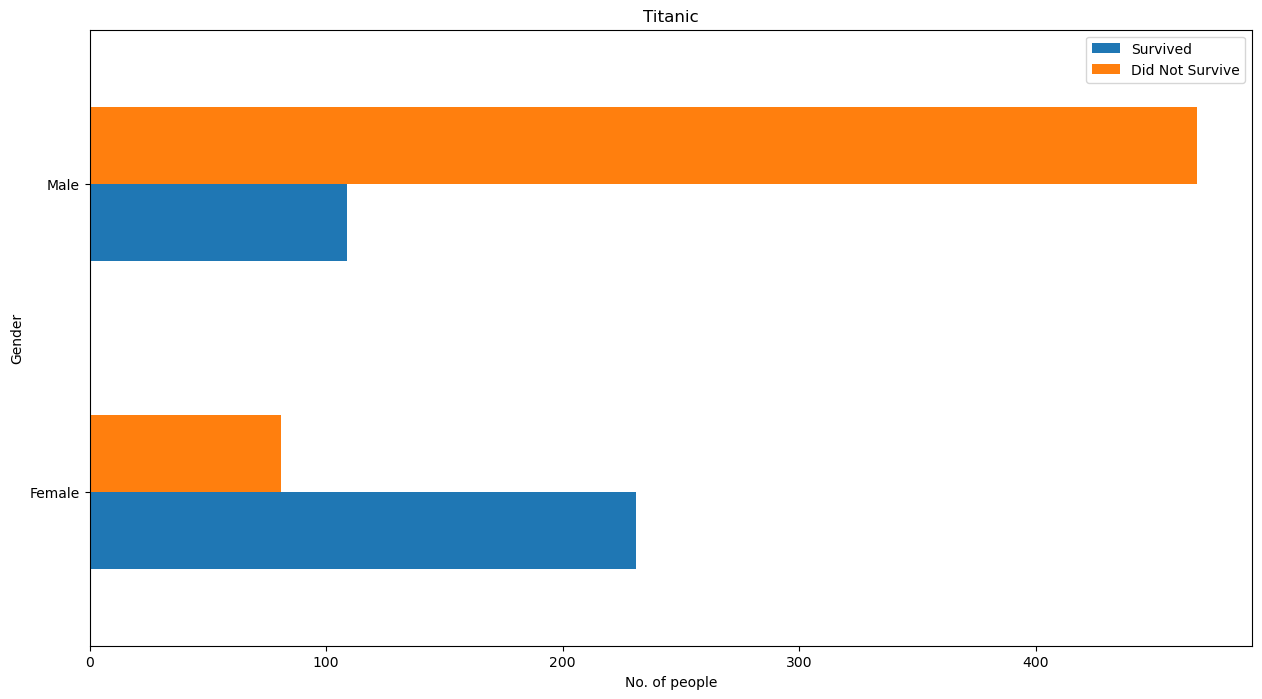

In [178]:
# Refer to Step4 Question 2 for reference for this horizontal bar chart
titanic['Gender'] = titanic['Sex_female'].map(lambda gender: 'Female' if gender==1 else 'Male') 
# create new column with Male and Female
titanic['NotSurvived'] = titanic['Survived'].map(lambda survived: 1 if survived==0 else 0)
# Create new column called "NotSurvived"
titanic_by_gender = titanic.groupby('Gender')[['Survived', 'NotSurvived']].sum()
titanic_by_gender.plot(kind='barh', rot=0, xlabel='No. of people', title='Titanic', figsize=(15,8));
plt.legend(labels=['Survived', 'Did Not Survive']);

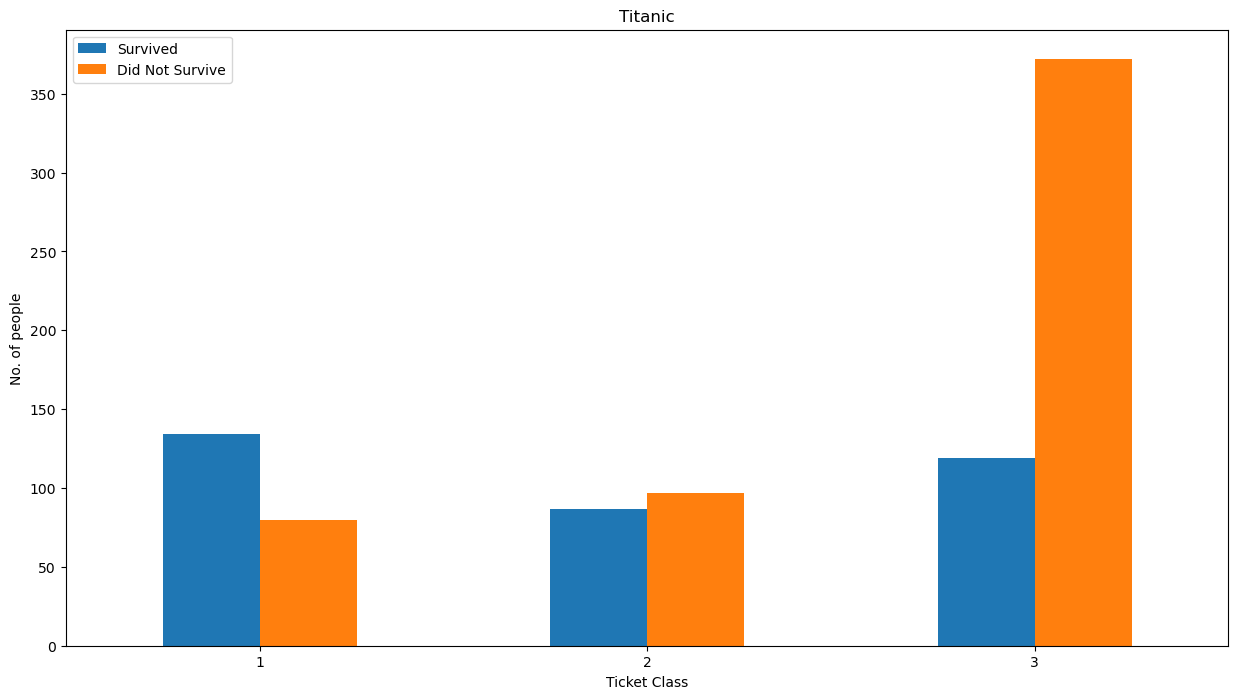

In [179]:
titanic_by_pclass = titanic.groupby('Pclass')[['Survived','NotSurvived']].sum()
titanic_by_pclass.plot(kind='bar', figsize=(15,8), rot=0, ylabel='No. of people', title='Titanic', xlabel='Ticket Class');
plt.legend(labels=['Survived', 'Did Not Survive']);

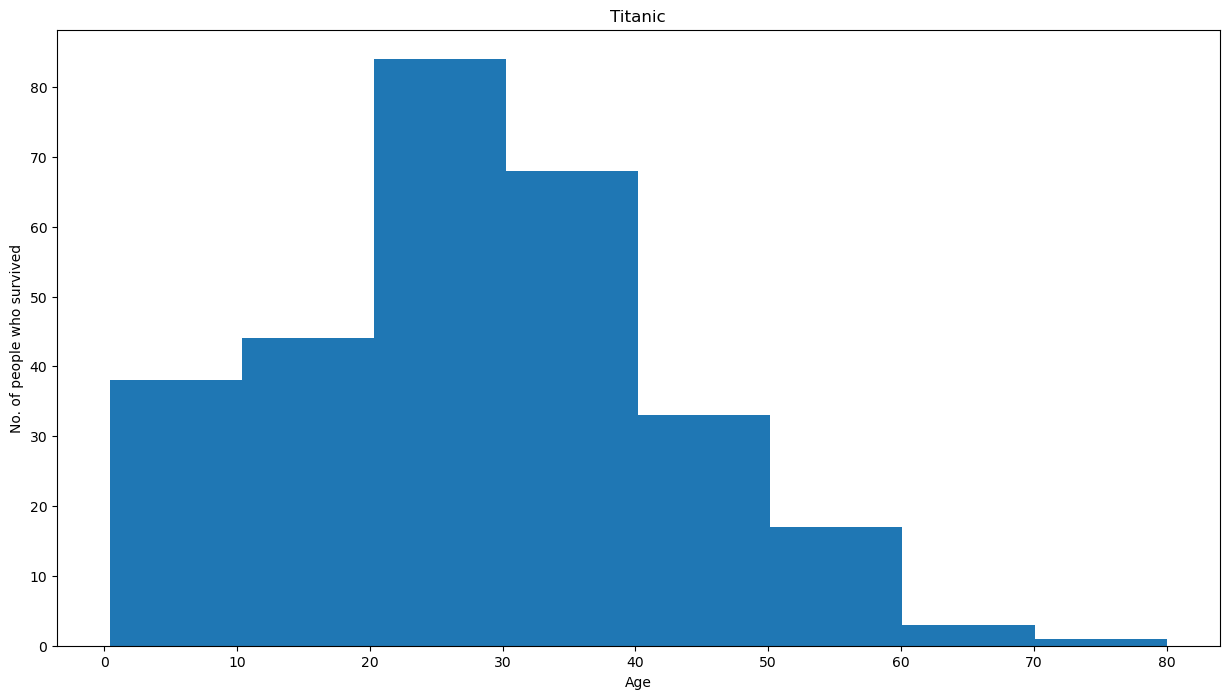

In [183]:
titanic_by_age = titanic[(titanic['Age'] != '¯\_(ツ)_/¯') & (titanic['Survived'] == 1)]
titanic_by_age['Age'].plot(bins=8, kind='hist', figsize=(15,8), rot=0, title='Titanic', ylabel='No. of people who survived', xlabel='Age');